In [1]:
import os
from PIL import Image, ImageOps
import numpy as np
from skimage import io, color
# Set the path to the directory containing your image classes
dataset_dir = "dataset1/"
# Initialize empty lists to store images and labels
images = []
labels = []
# Iterate through the directories in the dataset directory
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    if os.path.isdir(class_path):
        # Get the class label from the directory name
        label = class_dir
        # Iterate through the files in the class directory
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Load the image using PIL
                image_path = os.path.join(class_path, filename)
                image = Image.open(image_path)
                image = ImageOps.grayscale(image)
                # Resize the image (optional)
                image = image.resize((32, 32))
                # Convert the image to a NumPy array
                image_array = np.array(image)
                image_array=image_array.flatten()
                # Append the image to the list of images
                images.append(image_array)
                # Append the corresponding label
                labels.append(label)
images = np.array(images)
labels = np.array(labels)

In [2]:
import os
from PIL import Image
import numpy as np
# Set the path to the directory containing your image classes
dataset_dir = "test/"
# Initialize empty lists to store images and labels
images1 = []
labels1 = []
# Iterate through the directories in the dataset directory
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)
    if os.path.isdir(class_path):
        # Get the class label from the directory name
        label = class_dir
        # Iterate through the files in the class directory
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Load the image using PIL
                image_path = os.path.join(class_path, filename)
                image = Image.open(image_path)
                image = ImageOps.grayscale(image)
                # Resize the image (optional)
                image = image.resize((32, 32))
                # Convert the image to a NumPy array
                image_array = np.array(image)
                image_array=image_array.flatten()
                # Append the image to the list of images
                images1.append(image_array)      
                # Append the corresponding label
                labels1.append(label)
valimages = np.array(images1)
vallabels = np.array(labels1)

In [3]:
label_mapping = {"cat": -1, "dog": 1}
# Use NumPy's vectorized operations to replace values
labels = np.vectorize(label_mapping.get)(labels)
vallabels=np.vectorize(label_mapping.get)(vallabels)

In [4]:
class SVM:
    def __init__(self, learning_rate=0.0001, lambda_param=0.01, n_iters=1000,margin=1):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.margin=margin
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Mapping labels to 1 and -1 if needed
        y_ = np.where(y <= 0, -1, 1)
        # Initializing weights and biases
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.n_iters):    
            for idx, x_i in enumerate(X):
                # Updating weights and biases
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= self.margin
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)
    def hinge_loss(self, X, y):
        margins = y * (np.dot(X, self.w) - self.b)
        return np.mean(np.maximum(0, self.margin - margins))

In [5]:
clf = SVM()
clf.fit(images, labels)

In [6]:
# Predicting any test images
testimage = Image.open('test\dog\dog (1).jpg')
testimage = ImageOps.grayscale(testimage)         
# Resize the image (optional)
testimage = testimage.resize((32, 32))
testimage_array = np.array(testimage)
testimage_array=testimage_array.flatten()
clf.predict(testimage_array)

-1.0

In [7]:
# Evaluating loss
loss=clf.hinge_loss(valimages,vallabels)
print(loss)               

589.4772722922389


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = np.array(images)
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
images = (data - data_mean) / data_std
images = pca.fit_transform(images)

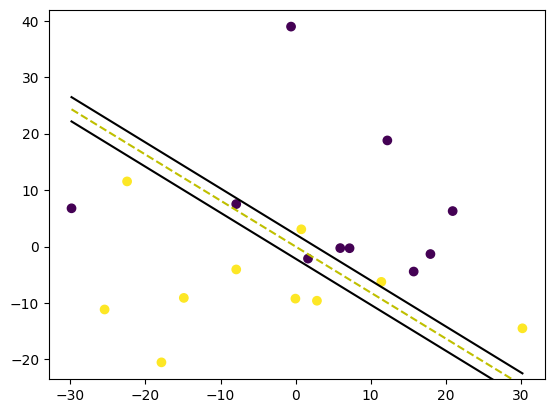

In [9]:
import matplotlib.pyplot as plt
# Visualizing SVM
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(images[:, 0], images[:, 1], marker="o", c=labels)
    x0_1 = np.amin(images[:, 0])
    x0_2 = np.amax(images[:, 0])
    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)
    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)
    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")
    x1_min = np.amin(images[:, 1])
    x1_max = np.amax(images[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    plt.show()
visualize_svm()